# How to compare several fields in one plot

The SciDataTool python module has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized through the use of a dictionary.

This tutorial explains the how to **compare** several fields, even if they are not defined with the same bases, or even if they were stored in different time/frequency domains.

After learning [how to create `Data` objects](https://github.com/Eomys/SciDataTool/blob/master/SciDataTool/Tutorials/tuto1_Create.ipynb) and [how to extract slices](https://github.com/Eomys/SciDataTool/blob/master/SciDataTool/Tutorials/tuto2_Slices.ipynb), you may want to **compare on a same graph** several fields. The `compare_along` methods will provide you a very practical tool to do so, as you can see in this first example:

<IPython.core.display.Javascript object>


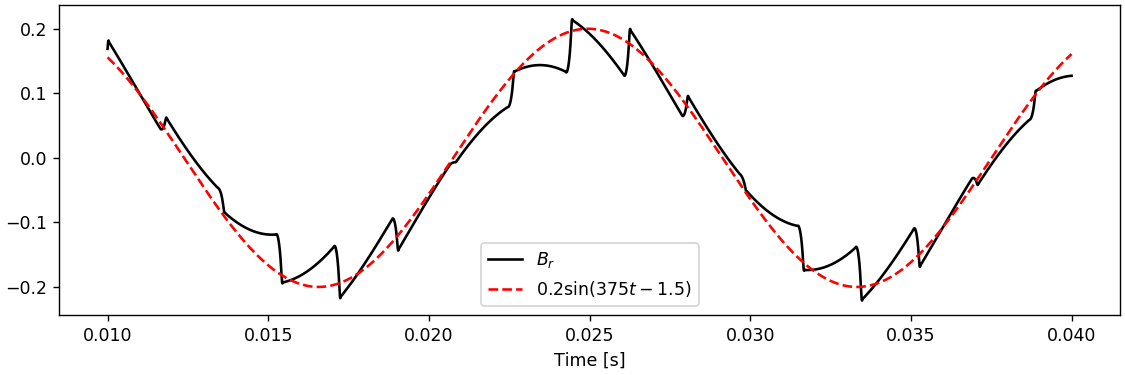

Text(0.5, 0, 'Time [s]')

In [6]:
%matplotlib notebook
# Add SciDataTool to the Python path
import sys
sys.path.append('../..')

# Import useful packages
from os.path import join
from numpy import pi, squeeze, linspace, sin
from pandas import ExcelFile, read_excel
import matplotlib.pyplot as plt

# Import SciDataTool modules
from SciDataTool.Classes.Data1D import Data1D
from SciDataTool.Classes.DataLinspace import DataLinspace
from SciDataTool.Classes.DataTime import DataTime
from SciDataTool.Tests import DATA_DIR

# Import scientific data
xls_file = ExcelFile(join(DATA_DIR, "tutorials_data.xlsx"))
time = squeeze(read_excel(xls_file, sheet_name="time", header=None, nrows=1, squeeze=True).to_numpy())
angle = squeeze(read_excel(xls_file, sheet_name="angle", header=None, nrows=1, squeeze=True).to_numpy())
field = read_excel(xls_file, sheet_name="Br", header=None, nrows=2016, squeeze=True).to_numpy()

# Create analytic field for comparison
t0 = 0.01
tf = 0.04
Nt = 3000
time2 = linspace(0.01, 0.04, 3000, endpoint=True)
sine_function = 0.2 * sin(375 * time2 - 1.5)

# Create Data objects
Time = Data1D(name="time", unit="s", values=time)
Angle = Data1D(name="angle", unit="rad", values=angle)
Br = DataTime(
            name="Airgap radial flux density",
            unit="T",
            symbol="B_r",
            axes=[Time, Angle],
            values=field,
        )
Time2 = DataLinspace(
            name="time",
            unit="s",
            symmetries={},
            initial=t0,
            final=tf,
            number=Nt,
            include_endpoint=True,
        )
Analytic = DataTime(
            symbol="0.2\sin(375t-1.5)",
            name="Sine function",
            unit="T",
            symmetries={},
            axes=[Time2],
            normalizations={},
            values=sine_function,
        )

#---------------------------------------------------------------
# Compare the fields
(Xdata1, Ydata1) = Br.compare_along("time", data_list=[Analytic])
#---------------------------------------------------------------

# Plot
fig = plt.figure(constrained_layout=True, figsize=(9, 3))
plt.plot(Xdata1, Ydata1[0], 'k', label=r"$"+Br.symbol+"$")
plt.plot(Xdata1, Ydata1[1], '--r', label=r"$"+Analytic.symbol+"$")
plt.legend()
plt.xlabel("Time [s]")

The `Data` classes allow to easily compare several fields in the same graph, even if they don't have the same basis or are stored in different time/frequency domains. To do so, the `compare_along` methods find a common basis for the axes requested, and interpolate the fields on this common basis. The syntax for requesting axes, unit and normalization, is the same as in a slice with the `get_along` methods.

An additional argument appears: the `data_list` is a **list** that contains the `Data` objects to compare to the original field.

Note that if `data_list` is not specified, the `get_along` method will simply be called, so that this method can be used **by default** (which can be useful to define **generic** plot methods). Note also that `compare_FT_along`, `compare_magnitude_along` and `compare_phase_along` are available for **comparisons of spectra**.